In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/recommender_system/

/content/drive/MyDrive/recommender_system


In [3]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sys.path.append('/content/drive/MyDrive/recommender_system/src')

In [5]:
f = "data/ml-latest-small/ratings.csv"


In [ ]:
split_ratio = 0.9
from src.data_struct.split_train_test import split_train_test

(userid_to_idx, idx_to_userid, data_train_by_user, data_test_by_user,
movieid_to_idx, idx_to_movieid, data_train_by_movie, data_test_by_movie) = split_train_test(f, split_ratio)

In [ ]:
from src.training.train_bias_embedding import *
k = 2
lamda = 0.01
gamma = 5
tau = 0.5
N = 20

m = len(data_train_by_user)
n = len(data_train_by_movie)
(user_biases, movie_biases, u,v, costs_train,
      rmse_train, rmse_test, costs_test) = train(data_train_by_user, data_train_by_movie, data_test_by_user,
                                                  k,lamda, gamma,tau, N)



Iteration   1/20	Train Loss:  3608.2937	Train RMSE: 2.2539	Test Loss:  1559.4848	Test RMSE: 2.2659	Time:   2.55s
Iteration  10/20	Train Loss:  2105.5425	Train RMSE: 1.4235	Test Loss:  1163.5451	Test RMSE: 1.4977	Time:  26.54s
Iteration  20/20	Train Loss:  2103.4345	Train RMSE: 1.4232	Test Loss:  1161.6390	Test RMSE: 1.4988	Time:  29.23s
Total duration: 58.32s


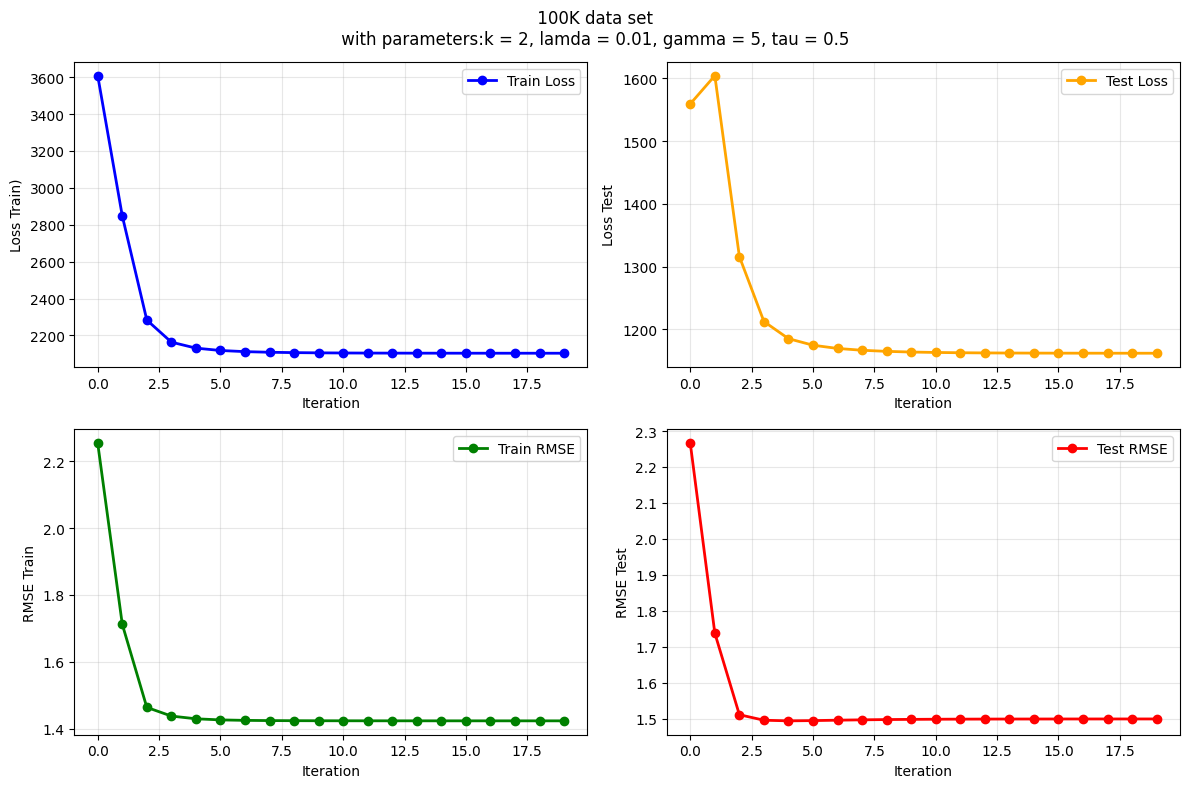

In [20]:
Namedata = "100K"
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(costs_train, label="Train Loss", color='blue', linewidth=2, marker='o')
ax[0, 0].set_ylabel("Loss Train)")
ax[0, 0].set_xlabel("Iteration")
ax[0, 0].legend()
ax[0, 0].grid(True, alpha=0.3)

ax[0, 1].plot(costs_test, label="Test Loss", color='orange', linewidth=2, marker='o')
ax[0, 1].set_ylabel("Loss Test")
ax[0, 1].set_xlabel("Iteration")
ax[0, 1].legend()
ax[0, 1].grid(True, alpha=0.3)

ax[1, 0].plot(rmse_train, label="Train RMSE", color='green', linewidth=2, marker='o')
ax[1, 0].set_ylabel("RMSE Train")
ax[1, 0].set_xlabel("Iteration")
ax[1, 0].legend()
ax[1, 0].grid(True, alpha=0.3)

ax[1, 1].plot(rmse_test, label="Test RMSE", color='red', linewidth=2, marker='o')
ax[1, 1].set_ylabel("RMSE Test")
ax[1, 1].set_xlabel("Iteration")
ax[1, 1].legend()
ax[1, 1].grid(True, alpha=0.3)

fig.suptitle(f" {Namedata} data set \n with parameters:k = {k}, lamda = {lamda}, gamma = {gamma}, tau = {tau} ")
plt.tight_layout()

#path = "../figure_saved"
#name_file = f"rating_distribution_{M_data}.pdf"

#os.makedirs(path, exist_ok=True)

#plt.savefig(os.path.join(path, name_file), format='pdf')

plt.show()


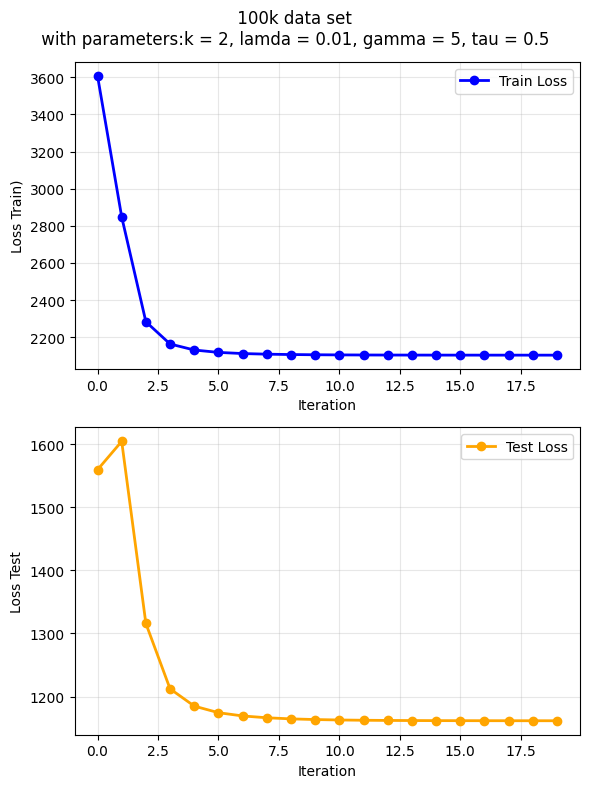

In [21]:
Namedata = "100k"
fig, ax = plt.subplots(2, 1, figsize=(6, 8))

ax[0].plot(costs_train, label="Train Loss", color='blue', linewidth=2, marker='o')
ax[0].set_ylabel("Loss Train)")
ax[0].set_xlabel("Iteration")
ax[0].legend()
ax[0].grid(True, alpha=0.3)


ax[1].plot(costs_test, label="Test Loss", color='orange', linewidth=2, marker='o')
ax[1].set_ylabel("Loss Test")
ax[1].set_xlabel("Iteration")
ax[1].legend()
ax[1].grid(True, alpha=0.3)

fig.suptitle(f" {Namedata} data set \n with parameters:k = {k}, lamda = {lamda}, gamma = {gamma}, tau = {tau} ")
plt.tight_layout()

# path = "figure_saved"
# name_file = f"loss_train_bias_embedding_{Namedata}.pdf"

# os.makedirs(path, exist_ok=True)

# plt.savefig(os.path.join(path, name_file), format='pdf')

plt.show()


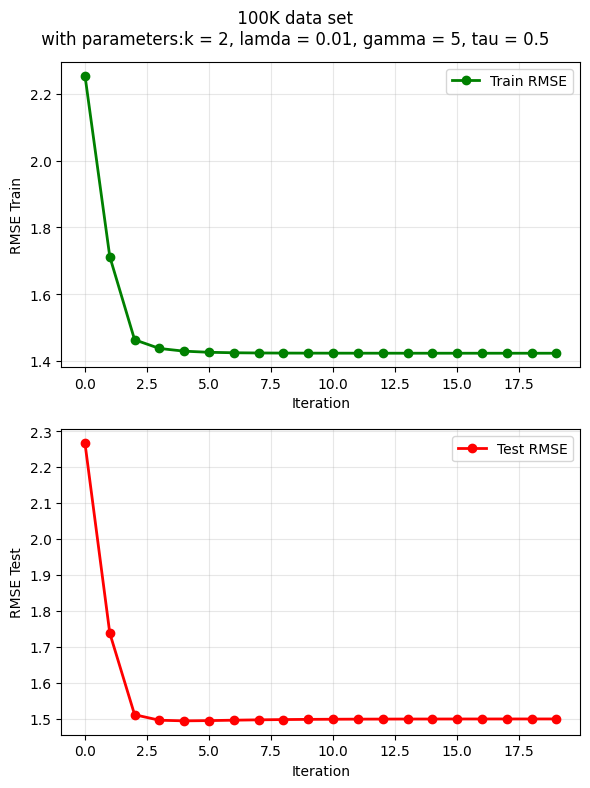

In [22]:
Namedata = "100K"
fig, ax = plt.subplots(2, 1, figsize=(6, 8))

ax[0].plot(rmse_train, label="Train RMSE", color='green', linewidth=2, marker='o')
ax[0].set_ylabel("RMSE Train")
ax[0].set_xlabel("Iteration")
ax[0].legend()
ax[0].grid(True, alpha=0.3)

ax[1].plot(rmse_test, label="Test RMSE", color='red', linewidth=2, marker='o')
ax[1].set_ylabel("RMSE Test")
ax[1].set_xlabel("Iteration")
ax[1].legend()
ax[1].grid(True, alpha=0.3)

fig.suptitle(f" {Namedata} data set \n with parameters:k = {k}, lamda = {lamda}, gamma = {gamma}, tau = {tau} ")
plt.tight_layout()

# path = "figure_saved"
# name_file = f"rating_distribution_{Namedata}.pdf"

# os.makedirs(path, exist_ok=True)

# plt.savefig(os.path.join(path, name_file), format='pdf')

plt.show()
